In [1]:
import pandas as pd
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
PATH_TO_DATA = "../dados/brutos/brasil_demografia_censo2010.json"

In [3]:
censo_df = pd.read_json(PATH_TO_DATA)

In [4]:
header = censo_df.loc[0]
censo_df.drop(index=0, inplace=True)
header

NC                            Nível Territorial (Código)
NN                                     Nível Territorial
D1C                  Brasil, Grande Região e UF (Código)
D1N                           Brasil, Grande Região e UF
D2C                                    Variável (Código)
D2N                                             Variável
D3C                                         Ano (Código)
D3N                                                  Ano
D4C                       Situação do domicílio (Código)
D4N                                Situação do domicílio
D5C                                        Sexo (Código)
D5N                                                 Sexo
D6C                                       Idade (Código)
D6N                                                Idade
D7C    Condição no domicílio e o compartilhamento da ...
D7N    Condição no domicílio e o compartilhamento da ...
MC                            Unidade de Medida (Código)
MN                             

In [5]:
censo_df["NN"].unique()

array(['Brasil', 'Grande Região', 'Unidade da Federação'], dtype=object)

# Regiões

In [6]:
regioes_df = pd.DataFrame(index=censo_df[censo_df["NN"] == "Grande Região"]["D1N"].unique(), columns=["rural", "urbana", "total"])

In [7]:
regioes_raw = censo_df[censo_df["NN"] == "Grande Região"]

In [8]:
regioes_df["total"] = regioes_raw[regioes_raw["D4N"] == "Total"]["V"].values
regioes_df["rural"] = regioes_raw[regioes_raw["D4N"] == "Rural"]["V"].values
regioes_df["urbana"] = regioes_raw[regioes_raw["D4N"] == "Urbana"]["V"].values

In [9]:
regioes_df = regioes_df.astype(int)

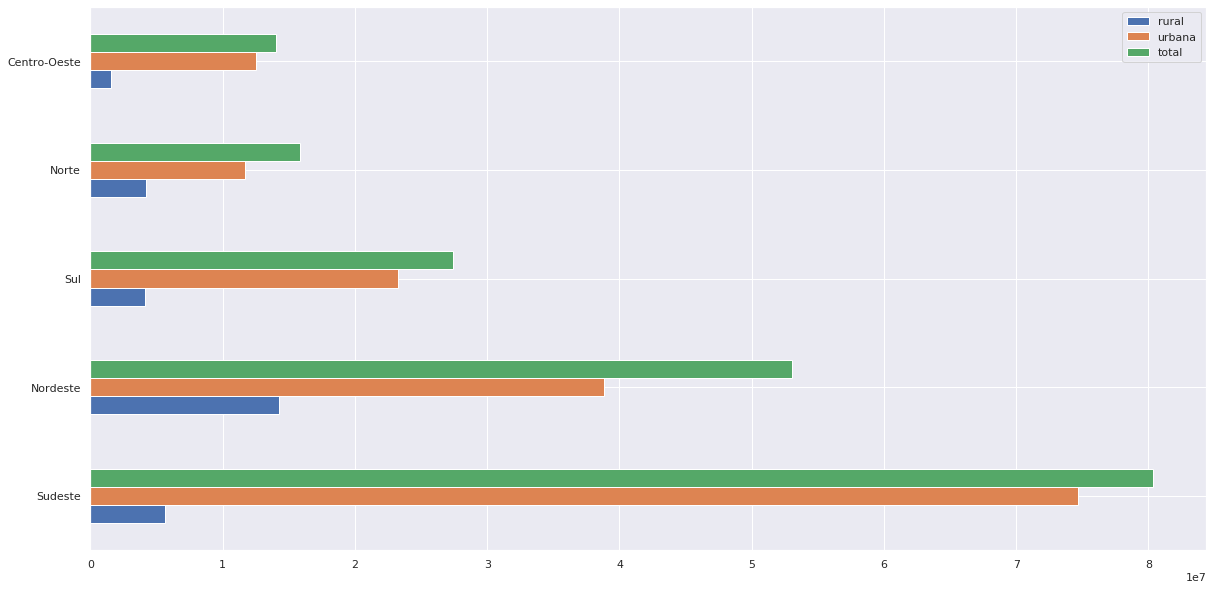

In [10]:
regioes_df.sort_values(by="total", ascending=False).plot.barh()

# Estados

In [11]:
estados_df = pd.DataFrame(index=censo_df[censo_df["NN"] == "Unidade da Federação"]["D1N"].unique(), columns=["rural", "urbana", "total"])


In [12]:
estados_raw = censo_df[censo_df["NN"] == "Unidade da Federação"]

In [13]:
estados_df["total"] = estados_raw[estados_raw["D4N"] == "Total"]["V"].values
estados_df["rural"] = estados_raw[estados_raw["D4N"] == "Rural"]["V"].values
estados_df["urbana"] = estados_raw[estados_raw["D4N"] == "Urbana"]["V"].values

In [14]:
estados_df

,rural,urbana,total
Rondônia,413229,1149180,1562409
Acre,201280,532279,733559
Amazonas,728495,2755490,3483985
Roraima,105620,344859,450479
Pará,2389492,5191559,7581051
Amapá,68490,601036,669526
Tocantins,293339,1090106,1383445
Maranhão,2427640,4147149,6574789
Piauí,1067401,2050959,3118360
Ceará,2105812,6346569,8452381


In [15]:
estados_df.astype(int)

,rural,urbana,total
Rondônia,413229,1149180,1562409
Acre,201280,532279,733559
Amazonas,728495,2755490,3483985
Roraima,105620,344859,450479
Pará,2389492,5191559,7581051
Amapá,68490,601036,669526
Tocantins,293339,1090106,1383445
Maranhão,2427640,4147149,6574789
Piauí,1067401,2050959,3118360
Ceará,2105812,6346569,8452381


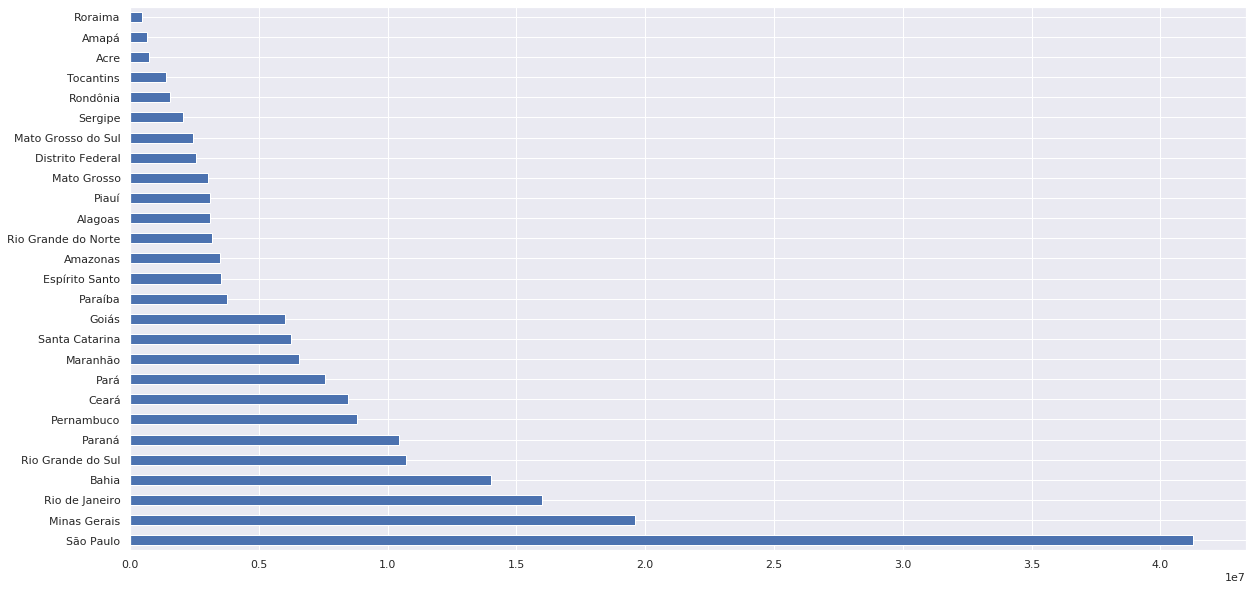

In [16]:
estados_df = estados_df.astype(int)
estados_df.sort_values(by="total", ascending=False)["total"].plot.barh()

# Salvando resultados

In [17]:
estados_df.to_excel("../dados/processados/brasil_demografia_censo2010.xlsx")